In [ ]:
%matplotlib inline

import numpy as np
import torch
import imageio
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
os.chdir("/content/drive/My Drive/PyTorch/pytorch_start/")


In [ ]:
img_arr = imageio.imread("data/p1ch4/image-dog/bobby.jpg")

## height, width, channel (h,w,c)
img_arr.shape


(720, 1280, 3)

In [ ]:
# Changing the layout
img = torch.from_numpy(img_arr)

# This will change (h,w,c) -> (c,h,w)
out = img.permute(2,0,1)
print(out.shape)


torch.Size([3, 720, 1280])


In [ ]:
# Pre allocating a tensor
batch_size = 4
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

data_dir = "data/p1ch4/image-cats/"
file_names = os.listdir(data_dir)

for i, filename in enumerate(file_names):
  img_arr = imageio.imread(data_dir + filename)
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2,0,1)
  img_t = img_t[:3]
  batch[i] = img_t


### NORMALIZATION


In [ ]:
# Divide by the highest pixel
# It will normailze from 0,1
batch_ = batch.float().clone()
batch_ /= 255.0


In [ ]:
n_channels = batch.shape[1]
batch_ = batch.float().clone()



In [ ]:
(batch_[:,0]).shape




torch.Size([4, 256, 256])

In [ ]:
# Using mean and standard deviation
n_channels = batch.shape[1]
batch_ = batch.float().clone()

for c in range(n_channels):
  mean = torch.mean(batch_[:,c])
  std = torch.std(batch_[:,c])
  batch[:, c] = (batch_[:, c] - mean) / std


NameError: ignored

### CT SCAN IMAGE

99 2D images stock on top of each other with no channel information

In [ ]:
dir_path = "data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, format='DICOM')
print(vol_arr.shape)


Reading DICOM (examining files): 1/99 files (1.0%2/99 files (2.0%3/99 files (3.0%4/99 files (4.0%5/99 files (5.1%6/99 files (6.1%7/99 files (7.1%8/99 files (8.1%9/99 files (9.1%10/99 files (10.1%11/99 files (11.1%12/99 files (12.1%13/99 files (13.1%14/99 files (14.1%15/99 files (15.2%16/99 files (16.2%17/99 files (17.2%18/99 files (18.2%19/99 files (19.2%20/99 files (20.2%21/99 files (21.2%22/99 files (22.2%23/99 files (23.2%24/99 files (24.2%25/99 files (25.3%26/99 files (26.3%27/99 files (27.3%28/99 files (28.3%29/99 files (29.3%30/99 files (30.3%31/99 files (31.3%32/99 files (32.3%33/99 files (33.3%34/99 files (34.3%35/99 files (35.4%36/99 files (36.4%37/99 files (37.4%38/99 files (38.4%39/99 files (39.4%40/99 files (40.4%41/99 files (41.4%42/99 files (42.4%43/99 files (43.4%44/99 files (44.4%45/99 files (45.5%46/99 files (46.5%47/99 files (47.5%48/99 files (48.5%49/99 files (49.5%50/99 files (50.5%51/99 files (51.5%52/99 files (52.5%53/99 files (53.5%54/99 files (54.5%55/99 files (

In [ ]:
# Since there is no channel information, we will have to unsqueeze to add it
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)
vol.shape


torch.Size([1, 99, 512, 512])

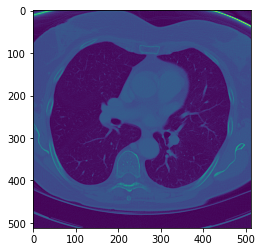

In [ ]:
plt.imshow(vol_arr[44])


### WINE DATASET PANDAS

In [ ]:
wine_df = pd.read_csv("data/p1ch4/tabular-wine/winequality-white.csv", delimiter=";")
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_df.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

### READING WITH NUMPY


In [ ]:
wine_path = "data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)


In [ ]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))
wineq_numpy.shape, col_list


((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype


(torch.Size([4898, 12]), torch.float32)

In [ ]:
data = wineq[:, :-1] # All the input data
data, data.shape


(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [ ]:
target = wineq[:, -1]
target, target.shape


(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

### TREATING THE **target** TENSOR AS CATEGORICAL

In [ ]:
target = wineq[:, -1].long()
target


tensor([6, 6, 6,  ..., 6, 7, 6])

### ONE HOT ENCODING

In [ ]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)

data_normalized = (data - data_mean)/torch.sqrt(data_var)


### QUERYING IN PYTORCH

In [ ]:
indx = target <= 3
indx.shape, indx.dtype, indx.sum()


(torch.Size([4898]), torch.bool, tensor(20))

In [ ]:
indx_data = data[indx]
indx_data.shape


torch.Size([20, 11])

### TIME SERIES DATA


In [ ]:
df_ts = pd.read_csv("data/p1ch4/bike-sharing-dataset/hour-fixed.csv")
df_ts.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_ts.season.unique()

array([1, 2, 3, 4])

In [ ]:
bikes_numpy = np.loadtxt("data/p1ch4/bike-sharing-dataset/hour-fixed.csv", dtype=np.float32, 
                         delimiter=",", skiprows=1, converters={1: lambda x: float(x[8:10])})


In [ ]:
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [ ]:
bikes.shape, bikes.stride()


(torch.Size([17520, 17]), (17, 1))

### EXCERCISE

In [ ]:
path_ = "/content/"

for i in ["blue", "red", "green"]:
  image_ = imageio.imread(path_ + i + ".jpg")
  image_tensor = torch.from_numpy(image_).to(dtype=torch.float32)
  print("\n", i)
  print(image_tensor.shape)
  print("MEAN", image_tensor.mean())




 blue
torch.Size([615, 615, 3])
MEAN tensor(137.0418)

 red
torch.Size([408, 612, 3])
MEAN tensor(60.7569)

 green
torch.Size([975, 1300, 3])
MEAN tensor(87.3491)
